# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Откроем файл с данными и изучим общую информацию.**

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

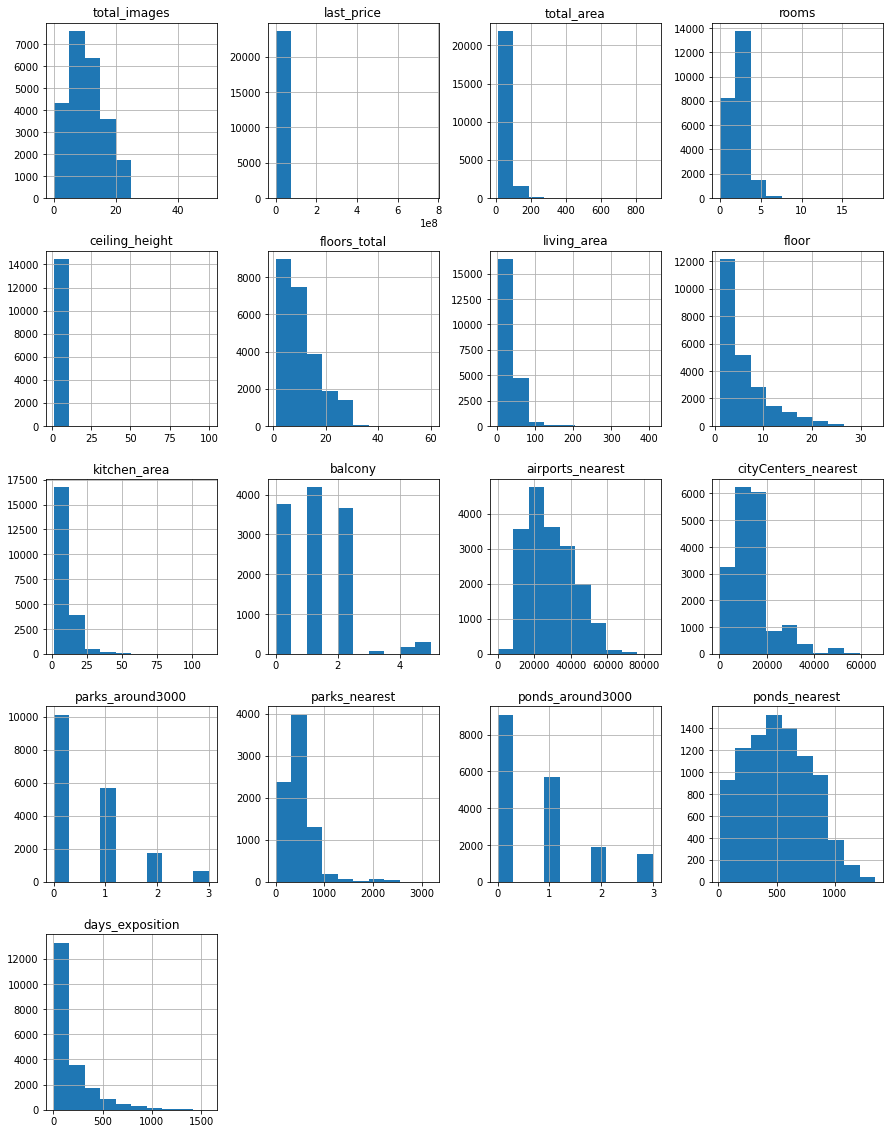

In [4]:
data.hist(figsize=(15, 20));

### Предобработка данных

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски еcть в большинстве столбцов: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest,  parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition. 

В столбцах ceiling_height, floors_total, is_apartment, locality_name, airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest логичную замену предложить невозможно. Пропуски в данных значениях можно считать случайными, потому что, например, хозяин квартиры не указал данное значение по каким-либо причинам или произошёл технический сбой, как например, в столбце is_apartment -- все пропущенные значения данного стобца можно заменить на False. Данные пропуски можно оставить незаполненными.

Пропуски в days_exposition могли возникнуть из-за того, что объявление все же в продаже.
Пропуски в столбцах living_area, kitchen_area легко восстановить по столбцу total_area.
В столбцах parks_around3000, ponds_around3000 и balcony пропущенные значения можно объяснить отсутствием данного объекта и заполнить их нулём.

In [6]:
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [7]:
data['kitchen_area'] = data['kitchen_area'].fillna((data['total_area']) - data['living_area'])
data['living_area'] = data['living_area'].fillna((data['total_area']) - data['kitchen_area'])
data['is_apartment'] = data['is_apartment'].fillna(False)

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1464
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             1464
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

Столбец first_day_exposition можно перевести в формат datetime, так как там хранятся данные в формате дат, но формат данных object. Для упрощения последующей работы стоит перевести в формат datetime. Столбец is_apartment можно перевести в булев тип, так как там хранится информация и так булева типа, но воспринимаемая Питоном, как object, и это нужно исправить. Кроме того, нужно поменять тип balcony в целочисленный.

In [9]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['balcony'] = data['balcony'].astype('int')

**Очистим данные в столбце locality_name от неявных повторов.**

In [10]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','')
data['locality_name'] = data['locality_name'].str.replace('поселок', '')
data['locality_name'] = data['locality_name'].str.replace('деревня', '')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество', '')
data['locality_name'] = data['locality_name'].str.replace('село', '')
data['locality_name'] = data['locality_name'].str.replace('городской', '')
data['locality_name'] = data['locality_name'].str.replace('имени', '')
data['locality_name'] = data['locality_name'].str.replace('станции', '')
data['locality_name'] = data['locality_name'].str.replace('при железнодорожной', '')
data['locality_name'] = data['locality_name'].str.replace('коттеджный', '')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество', '')
data['locality_name'] = data['locality_name'].str.strip()
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           22235 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          22235 non-null  float64       
 13  balcony         

In [12]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,22235.000000,23699.000000,22235.000000,23699.000000,18157.000000,18180.000000,23699.000000,8079.000000,23699.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.909588,5.892358,10.864963,0.591080,28793.672193,14191.277833,0.469049,490.804555,0.590911,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,23.117701,4.885249,6.804054,0.959298,12630.880622,8608.386210,0.748534,342.317995,0.883999,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.800000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.040000,4.000000,9.300000,0.000000,26726.000000,13098.500000,0.000000,455.000000,0.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.800000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,571.000000,33.000000,230.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В столбце ceiling_height есть максимальное значение 100 метров, тогда как такая высота потолков нереальна, поэтому данные в этом столбце необходимо проверить. Все значения, что будут больше 19 (так как потолки меньше, чем 1.9 м тоже реальны), будем делить на 10.
Максимальные значения в столбцах total_area, rooms, floors_total, living_area, floor, kitchen_area выбиваются из общих показателей и намного превышают 75% показателей, поэтому на них тоже необходимо обратить внимание.

In [13]:
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x/10 if x>19 else x)

<AxesSubplot:>

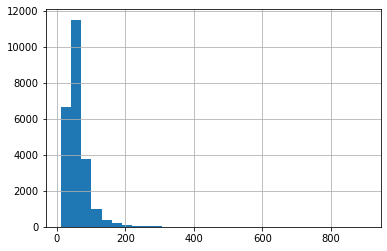

In [14]:
data['total_area'].hist(bins=30)

In [15]:
data = data[data.total_area < 200]

In [16]:
data['last_price'].sort_values(ascending=False)

1436     330000000.0
22831    289238400.0
17912    135000000.0
4996     124000000.0
16647    122000000.0
            ...     
16219       450000.0
16274       440000.0
14911       430000.0
17456       430000.0
8793         12190.0
Name: last_price, Length: 23468, dtype: float64

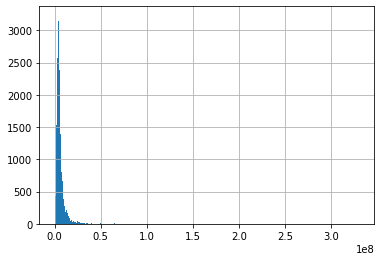

In [17]:
data['last_price'].hist(bins=500)
data = data[data.last_price < 50000000]

In [18]:
data['rooms'].sort_values(ascending=False)
data['floors_total'].sort_values(ascending=False)
data['living_area'].sort_values(ascending=False)
data['floor'].sort_values(ascending=False)
data['kitchen_area'].sort_values(ascending=False)

20542    117.9
869       89.0
742       77.0
14644     75.0
17944     74.2
         ...  
23632      NaN
23642      NaN
23663      NaN
23670      NaN
23679      NaN
Name: kitchen_area, Length: 23413, dtype: float64

Проверив остальные значения, раннее выбранные как нестандартные, мы обнаружили, что редких и сильно выбающихся значений нет.

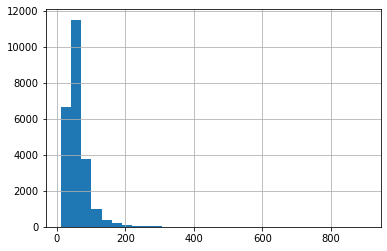

In [19]:
#код ревьюера
data2 = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
(data2['total_area']).hist(bins=30);

### Посчитайте и добавьте в таблицу новые столбцы

In [20]:
data['price_sm'] = (data['last_price']) / (data['total_area'])
data['day'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [21]:
def floor_definer(row):
    floor = row['floor']
    max_floor = row['floors_total']
    if floor == max_floor:
        return 'последний'
    if floor == 1:
        return 'первый'
    return 'другой'

data['floor_type'] = data.apply(floor_definer, axis=1)
print(data['floor_type'])

0        другой
1        первый
2        другой
4        другой
5        другой
          ...  
23694    другой
23695    другой
23696    первый
23697    другой
23698    первый
Name: floor_type, Length: 23413, dtype: object


In [22]:
data['center_m'] = round((data['cityCenters_nearest']) / 1000)

### Проведите исследовательский анализ данных

In [23]:
import matplotlib.pyplot as plt

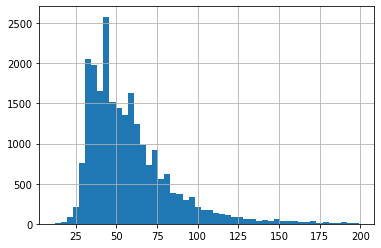

In [24]:
data['total_area'].hist(bins=50) 
plt.show()

Большинство продаваемых на рынке квартир не превышают общей площади в 100 квадратных метров, так как пик располагается в промежутке от 25 до 50 квадратных метров. Квартир с общей площадью, больше, чем 125 практически не обнаружено.

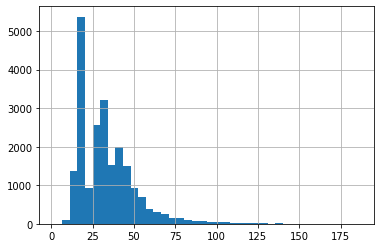

In [25]:
data['living_area'].hist(bins=40) 
plt.show()

Большинство продаваемых на рынке квартир не превышают жилой площади в 50 квадратных метров. Квартир с жилой площадью, больше, чем 75 практически не обнаружено.

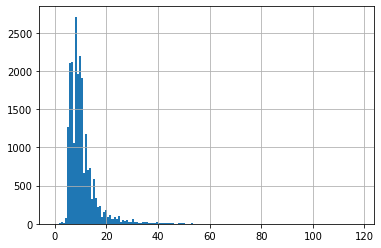

In [26]:
data['kitchen_area'].hist(bins=150) 
plt.show()

Большинство продаваемых на рынке квартир не превышают площади кухни в 20 квадратных метров. Квартир с площадью кухни, больше, чем 40 практически не обнаружено.

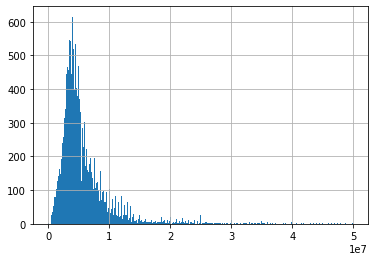

In [27]:
data['last_price'].hist(bins=500) 
plt.show()

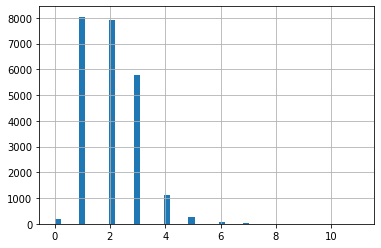

In [28]:
data['rooms'].hist(bins=50) 
plt.show()

В большинстве из продаваемых на рамке квартир не более 3 комнат. Квартир с более, чем шестью комнатами практически не обнаружено.

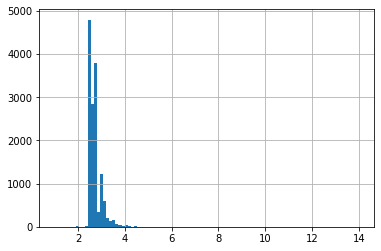

In [29]:
data['ceiling_height'].hist(bins=100) 
plt.show()

Высота потолков продаваемых на рынке квартир ранжирует от 2 до 4 метров. Квартир с меньшей или большей высотностью практически не обнаружено.

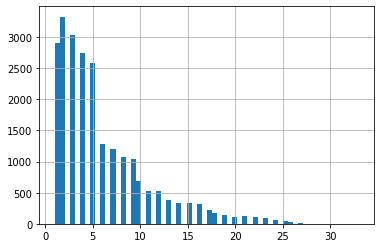

In [30]:
data['floor'].hist(bins=60) 
plt.show()

Большинство продаваемых на рынке квартир располагаются на 1-5 этажах и в дальнейшем мы наблюдаем тренд на постепенное снижение. Квартир, распологающихся выше, чем на 25 этаже, практически не обнаружено.

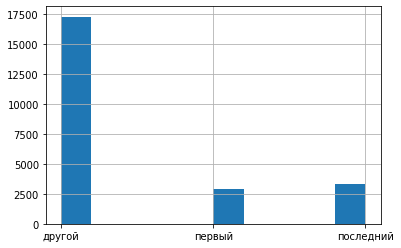

In [31]:
data['floor_type'].hist() 
plt.show()

Большинство продаваемых на рынке квартир находятся не на первом или последнем этаже. Квартир на первом или последнем этаже чуть больше 2500 соответственно.

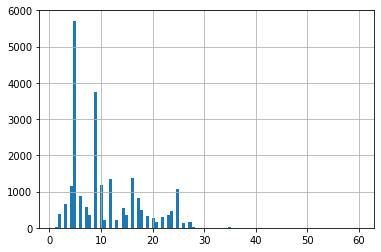

In [32]:
data['floors_total'].hist(bins=100) 
plt.show()

Высотность большинства домов, где продаются квартиры, ранжируется от 1 до 10 этажей. Домов же с высотностью более 30 этажей практически не обнаружено.

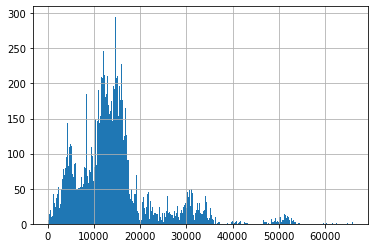

In [33]:
data['cityCenters_nearest'].hist(bins=500) 
plt.show()

Большинство продаваемых квартир находятся на расстоянии от центра города, не превышающее 20000 метров. Квартир же, располагаемых дальше, чем на расстоянии 55000 метров практически не обнаружено.

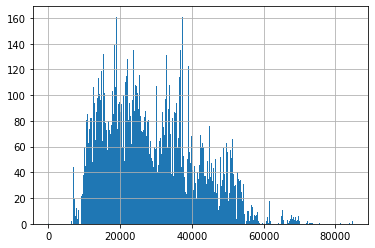

In [34]:
data['airports_nearest'].hist(bins=500) 
plt.show()

Большинство продаваемых квартир находятся на расстоянии от 10000 до 40000 метров до ближайшего аэропорта. Квартир же, располагаемых дальше, чем на расстоянии 80000 метров до аэропорта практически не обнаружено.

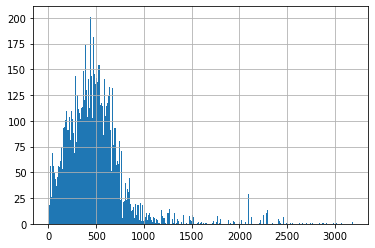

In [35]:
data['parks_nearest'].hist(bins=300) 
plt.show()

Большинство продаваемых квартир находятся на расстоянии до 1000 метров до ближайшего парка. Квартир же, располагаемых дальше, чем на расстоянии 2500 метров до парка практически не обнаружено.

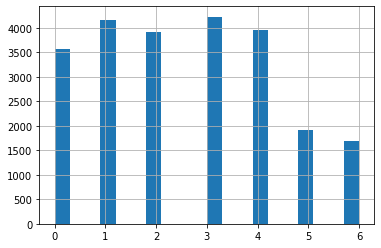

In [36]:
data['day'].hist(bins=20) 
plt.show()

Чаще квартиры выставляют на продажи в будни дни.

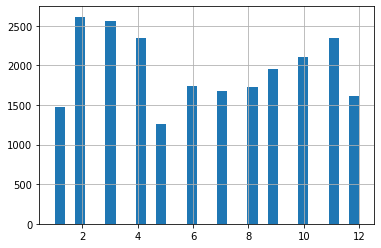

In [37]:
data['month'].hist(bins=30) 
plt.show()

Чаще всего квартиры выставляют в весенний (февраль-апрель) и осенний (сентябрь, октябрь, ноябрь) периоды.

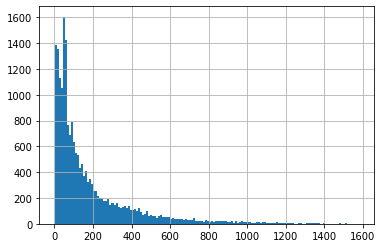

In [38]:
data['days_exposition'].hist(bins=150) 
plt.show()

In [39]:
data['days_exposition'].describe()

count    20298.000000
mean       179.445364
std        218.150043
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

В среднем квартиры продаются за 95 дней. Медианное значение же -- 179 дней, что практически в два раза превышает среднее значение, что говорит нам о том, что есть квартиры, которые продается слишком долго, по сравнению с другими объектами на рынке. Основываясь на данных квартилей мы можем сказать, что продажи можно считать быстрыми, если квартира продалась быстрее, чем за 45 дней. Долгими же будем считать сроки продаж, превышающие 229 дней.

**Изучим, зависит ли цена от следующих объектов:**
1. Общей площади 

0.7674250774487252


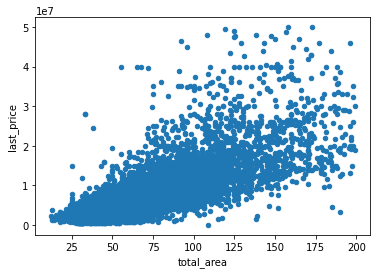

In [40]:
data.plot(x='total_area',y='last_price',kind='scatter')
print(data['total_area'].corr(data['last_price']))

2. Жилой площади

0.6519617899727087


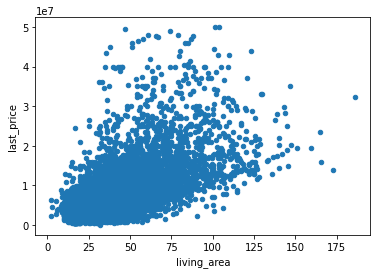

In [41]:
data.plot(x='living_area',y='last_price',kind='scatter')
print(data['living_area'].corr(data['last_price']))

3. Площади кухни

0.5449955726667991


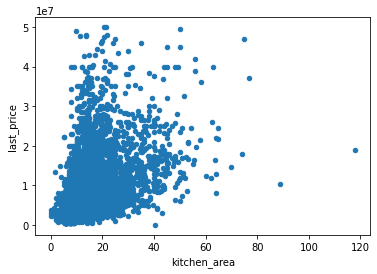

In [42]:
data.plot(x='kitchen_area',y='last_price',kind='scatter')
print(data['kitchen_area'].corr(data['last_price']))

4. Количества комнат

0.47092439579660594


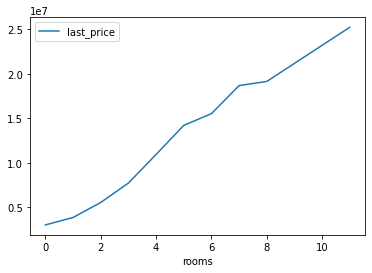

In [43]:
data.pivot_table(index='rooms', values='last_price', aggfunc='mean').plot()
print(data['rooms'].corr(data['last_price']))

5. Типа этажа

<AxesSubplot:xlabel='floor_type'>

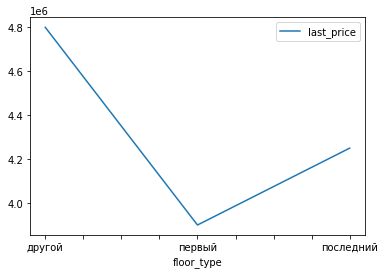

In [44]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot()

6. Дня недели, в котором было выставленно объявление

<AxesSubplot:xlabel='day'>

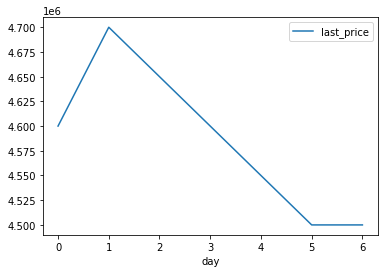

In [45]:
data.pivot_table(index='day', values='last_price', aggfunc='median').plot()

7. Месяца, в который было выставленно объявление

<AxesSubplot:xlabel='month'>

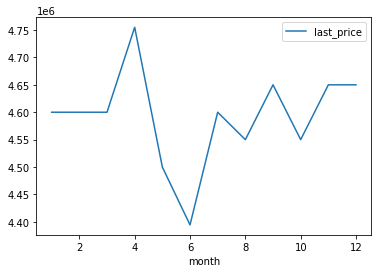

In [46]:
data.pivot_table(index='month', values='last_price', aggfunc='median').plot()

8. Года, в который было выставлено объявление

<AxesSubplot:xlabel='year'>

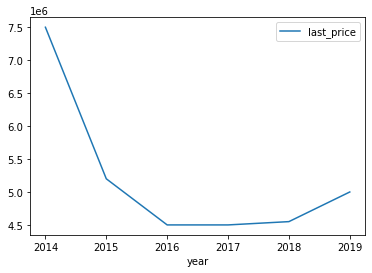

In [47]:
data.pivot_table(index='year', values='last_price', aggfunc='median').plot()

**Посмотрим на среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и на среднюю цену в зависимости от удаленности от центра**

<AxesSubplot:xlabel='locality_name'>

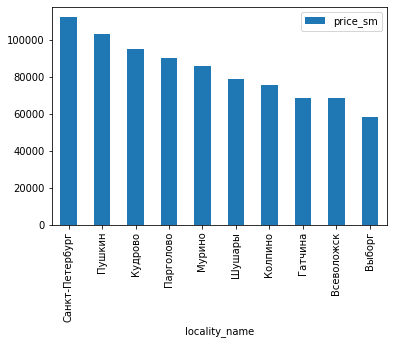

In [48]:
cities = data.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10)

data.query('locality_name in @cities.index').pivot_table(
    index='locality_name', values='price_sm', aggfunc='mean').sort_values(by='price_sm', 
                                                                          ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='center_m'>

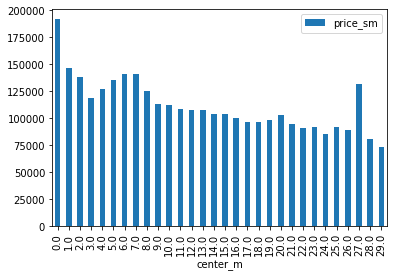

In [49]:
data.query('locality_name == "Санкт-Петербург"').pivot_table(
    index='center_m', values='price_sm', aggfunc='mean').sort_values(by='center_m', ascending=True).plot(kind='bar')

Самые дорогие квартиры в самом центре Санкт-Петербурга -- в 0 км. Дальнейший тренд наблюдается в общем в постепенном снижении цены в зависимости от удаления от центра города, наравне с немного выбивающими значениями -- например, отдаленность в 27 километров.

### Общий вывод

Исходя из итогов проведенного исследования, можно сделать следующие выводы:
1. Увеличение общей площади квартиры, а также жилой площади и площади кухни положительно влияет на общую стоимость квартиры, что подтверждается достаточно сильной корреляцией для общей площади (0.77) и умеренной корреляцией для жилой площади и площади кухни (0.65 и 0.54 соответственно), так как прочие факторы также могут влиять на стоимость квартир (например, удаленность от центра).
2.  Количество комнат в квартирах также положительно влияют на стоимость недвижимости — чем больше комнат, тем дороже квартира. Однако корреляцией не сильная (0.47), что говорит о влиянии прочих факторов, помимо комнатности.
3. Покупатели мало заинтересованы в покупке квартир на первом и последнем этажах, поэтому стоимость квартир в данных категориях значительно меньше, чем на прочих этажах.
4. Квартиры, выложенные во вторник значительно дороже квартир, выложенные в прочие будние дни. Самые дешевые квартире на рынке были выложены в выходной — суббота и воскресенье.
5. Никакой общей зависимости по стоимости квартиры от месяца года выявить не удалось. Однако, меньше всего квартиры в среднем стоят в летние месяца (июнь), больше всего в весенние и осенние (апрель, сентябрь).
6. С 2014 по 2018 год наблюдалась отрицательная динамика в стоимости квартир — недвижимости стремительно дешевела. С 2018 года начинается рост в стоимости квартир.
7. Самые дорогие квартиры в окрестностях Санкт-Петербурга находятся в центре Санкт-Петербурга. Удаленность от центра отрицательно влияет на стоимость 